<a href="https://colab.research.google.com/github/deftydev/Deep-Learning/blob/main/cnn_models_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d warcoder/tyre-quality-classification

100% 2.66G/2.66G [00:35<00:00, 52.2MB/s]
100% 2.66G/2.66G [00:35<00:00, 81.0MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/tyre-quality-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16

In [5]:
model= VGG16(weights='imagenet')

553467096/553467096 [==============================] - 3s 0us/step


In [6]:
import cv2
import matplotlib.pyplot as plt
image= cv2.imread("/content/Digital images of defective and good condition tyres/good/good (184).jpg")

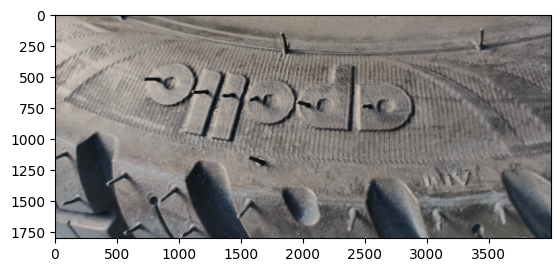

In [7]:
plt.imshow(image)

In [8]:
img_resize=cv2.resize(image,(224,224))

In [9]:
img_input=img_resize.reshape((1,224,224,3))

In [10]:
pred=model.predict(img_input)

1/1 [==============================] - 8s 8s/step


In [11]:
import tensorflow as tf

In [12]:
tf.keras.applications.imagenet_utils.decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n04355338', 'sundial', 0.13194418),
  ('n03764736', 'milk_can', 0.12013323),
  ('n02895154', 'breastplate', 0.10210501),
  ('n03146219', 'cuirass', 0.083707735),
  ('n03814906', 'necklace', 0.04209567)]]

It is giving wrong predictions , you can also try to change weights according to your data

We can use any model like resnet as these are pretrained models for image classification

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [14]:
model2= ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


In [15]:
tf.keras.applications.resnet50.preprocess_input(
    img_input
)

array([[[[ 52.060997 ,  50.221    ,  51.32     ],
         [ 46.060997 ,  43.221    ,  45.32     ],
         [ 59.060997 ,  56.221    ,  59.32     ],
         ...,
         [  1.060997 , -11.778999 , -12.68     ],
         [ 24.060997 ,  11.221001 ,   7.3199997],
         [ 22.060997 ,   7.2210007,   5.3199997]],

        [[ 51.060997 ,  48.221    ,  50.32     ],
         [ 37.060997 ,  34.221    ,  37.32     ],
         [ 55.060997 ,  52.221    ,  55.32     ],
         ...,
         [ 16.060997 ,   3.2210007,   1.3199997],
         [ 26.060997 ,  12.221001 ,   9.32     ],
         [ -0.939003 , -19.779    , -18.68     ]],

        [[ 51.060997 ,  48.221    ,  50.32     ],
         [ 44.060997 ,  41.221    ,  44.32     ],
         [ 53.060997 ,  50.221    ,  53.32     ],
         ...,
         [ 11.060997 ,  -1.7789993,  -3.6800003],
         [-10.939003 , -24.779    , -23.68     ],
         [ -3.939003 , -20.779    , -18.68     ]],

        ...,

        [[ 59.060997 ,  37.221    ,  2

In [16]:
pred=model2.predict(img_input)

1/1 [==============================] - 2s 2s/step


In [17]:
tf.keras.applications.imagenet_utils.decode_predictions(pred)

[[('n03903868', 'pedestal', 0.3461998),
  ('n03710193', 'mailbox', 0.11872743),
  ('n02910353', 'buckle', 0.09353329),
  ('n02892201', 'brass', 0.08262482),
  ('n04355338', 'sundial', 0.055262905)]]

Now we will do fine tuning

**Fine Tuning of pre trained model**

load vgg and perform fine tuning

include top=True means take fully connected layers at end *italicized text*

In [18]:
conv_base= VGG16(weights="imagenet",
                 include_top=False,
                 input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [19]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [22]:
conv_base.layers

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

it ended at maxpolling 2d as there are nofully connected layers included

In [24]:
model= Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# As Conv Base we are taking from pre trained VGG16 model, so we do not need to train it

In [26]:
conv_base.trainable=False

In [27]:
train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/Digital images of defective and good condition tyres',
    batch_size=32,
    image_size=(150,150),
    labels="inferred",
    label_mode="int"

)

Found 1856 files belonging to 2 classes.


In [28]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(train_ds,epochs=2)

Epoch 1/2
58/58 [==============================] - 53s 790ms/step - loss: 0.1848 - accuracy: 0.9289
Epoch 2/2
58/58 [==============================] - 64s 935ms/step - loss: 0.1128 - accuracy: 0.9585


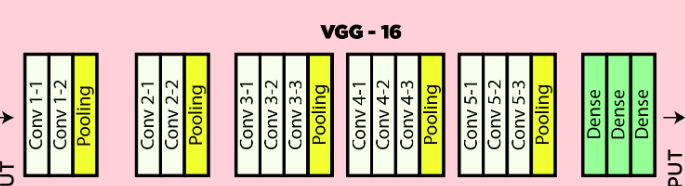

In [34]:
conv_base= VGG16(weights="imagenet",
                 include_top=False,
                 input_shape=(150,150,3))

In [36]:
for layer in conv_base.layers:
  print(layer.name)

input_4
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [39]:
conv_base.trainable=True

set_trainable=False

for layer in conv_base.layers:
  if layer.name=="block5_conv1":
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False


In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

This we have done because we want to train one layer present in conv layer as you can see above that it consists of trainable and non trainable both **params**

In [41]:
model= Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
model.fit(train_ds,epochs=2)

Epoch 1/2
58/58 [==============================] - 55s 716ms/step - loss: 0.9892 - accuracy: 0.5496
Epoch 2/2
58/58 [==============================] - 50s 743ms/step - loss: 0.6892 - accuracy: 0.5539
